# DSCI 100 Group Proposal to Investigate Income Predictors


### Introduction

In the past, many studies have highlighted the interplay between socioeconomic factors and an individual’s financial success in the workplace. In this dataset, a census from 1994, data was collected for various categorical, numeric, and binary variables, including age, work class, occupation, hours worked per week, marital status, sex, capital gain, capital loss, and native country. Previous studies have supported the notion of differences in earnings with different work times and levels of education, the latter of which Harvard Business School refers to as the “degree gap” (Fuller et al., 2017). Therefore, using data related to these two variables for our project, we aim to answer the question: do work hours and education levels predict whether or not a person’s income would exceed $50,000 a year in 1994?  


### Methods

We expect to conduct our data analysis by determining the k-value with the most accuracy and performing a k-nearest-neighbor classification. We plan to set the binary “income” variable (>\\$50K, <=\\$50K) as the response variable and “work_hours_per_week” (1 - 99 hours) and “education_num” (levels 1 - 16) as the predictor variables. Thus, we believe these two variables are among the most relevant variables affecting an individual’s income bracket and are curious to see how accurately these variables can predict said income bracket. To visualize the results, we will use a scatterplot of the work_hours_per_week and education_num variables, color-coded with the binary income options of >\\$50K and <=\\$50K. 

### Significance

After our analysis, we expect to find that those with education levels on the lower ends of the spectrum, despite working a greater number of hours per week, would be predicted to make less than \\$50K in 1994 compared to an individual working equivalent or fewer hours with a higher academic degree. This could be because higher-paying jobs in 1994 were barred behind progressively increasing academic qualifications, making it so that longer working hours did not necessarily equate to increased odds of making more than \\$50K. Thus, the impact of these findings from 1994 could show the importance of breaking barriers to higher education given the current rise of degree inflation, where even a bachelor’s is now regarded with diminishing importance in the workplace. These findings could also be used for future questions and research comparing the progression, extent, and effects of degree inflation within the past 20 years.


In [2]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
install.packages("kknn")
library(kknn)

options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [3]:
#loads dataset from github and cons column names
adult_data <- read_delim("https://raw.githubusercontent.com/Bi0informatic/d-sci-100-group-project/main/data/adult.data", delim = ",", show_col_types = FALSE)

colnames(adult_data) <- c("age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income")
adult_data

age workclass         fnlwgt  education  education_num
1     50   Self-emp-not-inc  83311   Bachelors  13          
2     38   Private           215646  HS-grad    9           
3     53   Private           234721  11th       7           
⋮     ⋮   ⋮                 ⋮       ⋮          ⋮            
32558 58   Private           151910  HS-grad    9           
32559 22   Private           201490  HS-grad    9           
32560 52   Self-emp-inc      287927  HS-grad    9           
      marital_status      occupation         relationship   race   sex    
1      Married-civ-spouse  Exec-managerial    Husband        White  Male  
2      Divorced            Handlers-cleaners  Not-in-family  White  Male  
3      Married-civ-spouse  Handlers-cleaners  Husband        Black  Male  
⋮     ⋮                   ⋮                  ⋮              ⋮      ⋮      
32558  Widowed             Adm-clerical       Unmarried      White  Female
32559  Never-married       Adm-clerical       Own-child      White  Male  
32560  Married-civ-spouse  Exec-managerial    Wife           White  Female
      capital_gain capital_loss hours_per_week native_country income
1      0            0            13             United-States  <=50K
2      0            0            40             United-States  <=50K
3      0            0            40             United-States  <=50K
⋮     ⋮            ⋮            ⋮              ⋮              ⋮     
32558  0            0            40             United-States  <=50K
32559  0            0            20             United-States  <=50K
32560  15024        0            40             United-States  >50K

## Cleaning and Wrangling the data

In [4]:
set.seed(26)
# selects the columns needed 
adult_data_selected <- select(adult_data, income, hours_per_week, education_num, education) 

# changes education_num and hours_per_week to numeric from chr
# changes income from chr to factor
adult_data_selected <- adult_data_selected |>
                        mutate(education_num = as.numeric(education_num)) |>
                        mutate(hours_per_week = as.numeric(hours_per_week)) |>
                        mutate(income = as.factor(income))

# splits data into training and testing
adult_split <- initial_split(adult_data_selected, prop = 0.75, strata = income)
adult_training <- training(adult_split) 
adult_testing <- testing(adult_split)
adult_testing_recipe <- recipe(income ~ education_num, hours_per_week, data = adult_training) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())




 

### Table 1. First 6 Rows of Cleaned Data

In [5]:
head(adult_data_selected)

income hours_per_week education_num education 
1  <=50K 13             13             Bachelors
2  <=50K 40              9             HS-grad  
3  <=50K 40              7             11th     
4  <=50K 40             13             Bachelors
5  <=50K 40             14             Masters  
6  <=50K 16              5             9th

### Exploratory Data Analysis

#### Box plot to show differences - part of eda

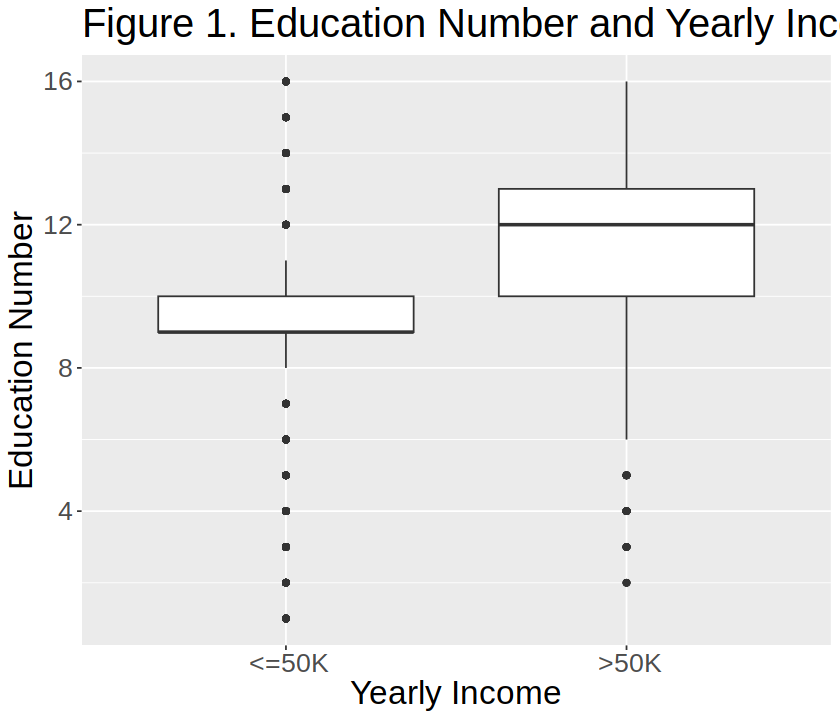

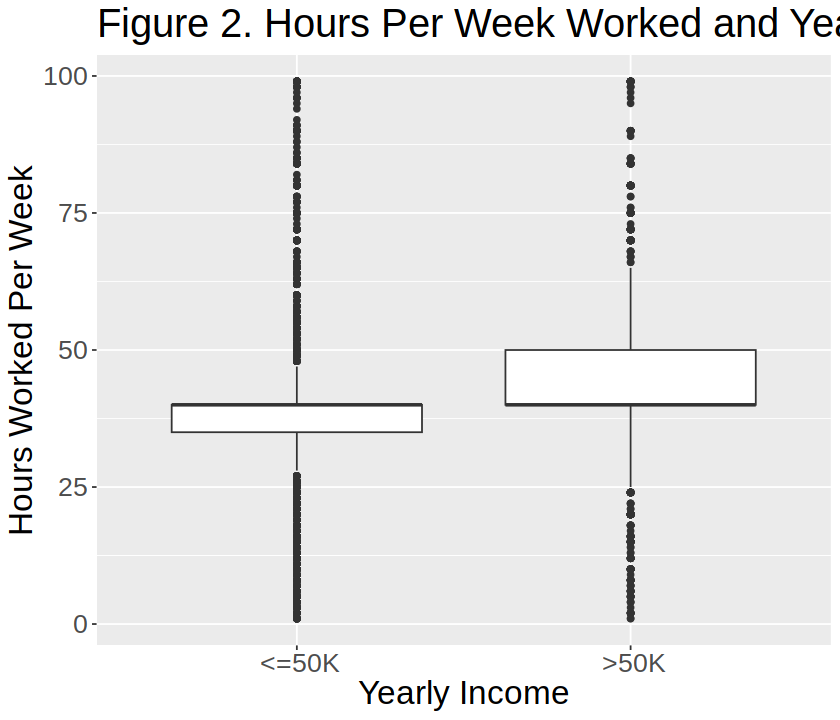

In [6]:
options(repr.plot.width = 7, repr.plot.height = 6)
# box plots to decide if there is significant statistical difference between variables
adult_data_selected |>
    ggplot(aes(y = education_num, x = income)) +
    geom_boxplot() +
    ylab("Education Number") +
    xlab("Yearly Income") +
    ggtitle("Figure 1. Education Number and Yearly Income Box Plot") +
    theme(text = element_text(size = 20))
    
adult_data_selected |>
    ggplot(aes(y = hours_per_week, x = income)) +
    geom_boxplot() +
    ylab("Hours Worked Per Week") +
    xlab("Yearly Income") +
    ggtitle("Figure 2. Hours Per Week Worked and Yearly Income Box Plot") +
    theme(text = element_text(size = 20))

- Since box plots do not overlap, it shows significant statistical difference
- hence both variables can be used to predict income

## Statistics

In [7]:
# creates count of how many individuals have incomes <=50k and >50k
income_sum <- adult_data_selected |> 
                group_by(income) |> 
                summarize(count = n())

# average hrs_per_wk on individuals who have incomes of <=50k and >50k
mean_hrs_per_wk <- adult_data_selected |>
                group_by(income) |>
                summarize(mean_hrs_per_wk = mean(hours_per_week) )

# average education_num on individuals who have incomes of <=50k and >50k
mean_education_num <- adult_data_selected |>
                group_by(income)|>
                summarize(mean_education_num = mean(education_num))






### Table 2. Income Counts

In [8]:
income_sum

income count
1  <=50K 24719
2  >50K   7841

### Table 3. Mean Education Numbers for Income

In [9]:
mean_education_num

income mean_education_num
1  <=50K  9.594927         
2  >50K  11.611657

### Table 4. Mean Hours Worked Per Week for Income

In [10]:
mean_hrs_per_wk

income mean_hrs_per_wk
1  <=50K 38.84016       
2  >50K  45.47303

# Training KNN

In [11]:
# create the knn_spec for classification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# create the recipe for training
adult_testing_recipe <- recipe(income ~ education_num + hours_per_week, data = adult_training) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())

# create folds for cross-validation
adult_vfold <- vfold_cv(adult_training, v = 5, strata = income)


gridvals <- tibble(neighbors = seq(from = 1, to = 120, by = 20))


# workflow of training data
adult_training_workflow <- workflow() |>
                add_recipe(adult_testing_recipe) |>
                add_model(knn_spec) |>
                tune_grid(resamples = adult_vfold, grid = gridvals) 


adult_metrics <- adult_training_workflow |>
collect_metrics() |>
filter(.metric == "accuracy")




### Table 5. 

In [12]:
adult_metrics

neighbors .metric  .estimator mean      n std_err      .config             
1   1       accuracy binary     0.7585896 5 0.0008234008 Preprocessor1_Model1
2  21       accuracy binary     0.7687456 5 0.0006487427 Preprocessor1_Model2
3  41       accuracy binary     0.7722264 5 0.0016901523 Preprocessor1_Model3
4  61       accuracy binary     0.7757483 5 0.0014882467 Preprocessor1_Model4
5  81       accuracy binary     0.7781235 5 0.0014751770 Preprocessor1_Model5
6 101       accuracy binary     0.7811948 5 0.0023715915 Preprocessor1_Model6

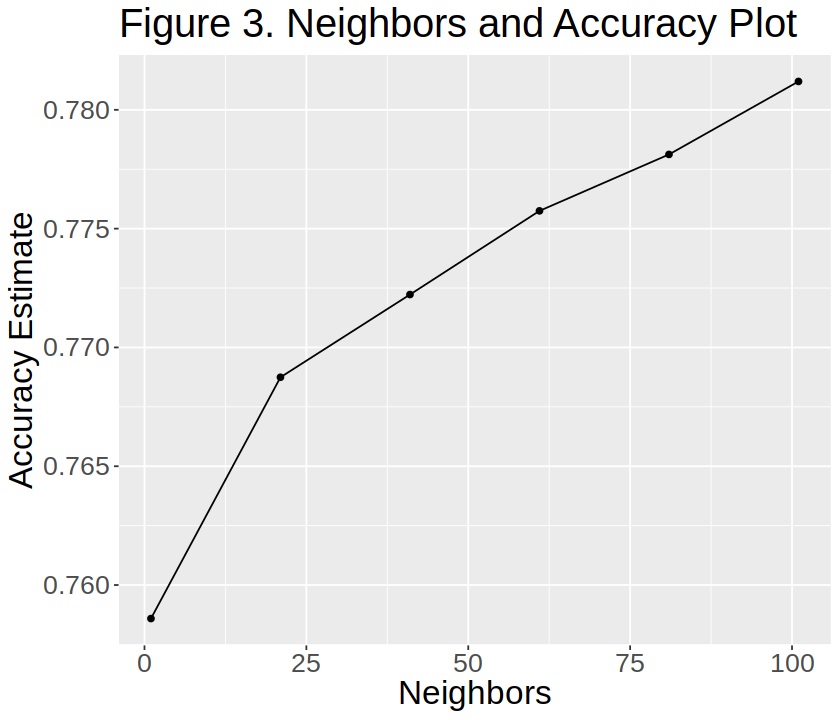

In [13]:
# creates plot to find best k value
adult_metric_plot <- ggplot(adult_metrics, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("Figure 3. Neighbors and Accuracy Plot") +
    theme(text = element_text(size = 20))
adult_metric_plot

adult_max <- adult_metrics |>
        filter(neighbors == max(neighbors))

# find k value that is the more accurate
a_max <- adult_max |> pull(neighbors)


### Chosen K-Value

In [14]:
a_max

[1] 101

# Trained KNN

In [ ]:
# spec, recipe, and workflow to predict data
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = a_max) |>
    set_engine("kknn") |>
    set_mode("classification") 



knn_recipe <- recipe( income ~ education_num + hours_per_week, data = adult_data_selected) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) 


knn_workflow <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) |>
    fit(data = adult_data_selected)





In [ ]:
options(repr.plot.width = 7, repr.plot.height = 6)

# predict testing data using trained knn
knn_predict <- predict(knn_workflow, adult_testing) |>
    bind_cols(adult_testing)

# scatter plot of predicted income
predicted_scatterplot <- knn_predict |>
    ggplot(aes(x = hours_per_week, y = education_num, color = .pred_class)) +
    geom_point(alpha = 0.5) +
    labs(x = "Hours Worked Per Week", y = "Education Level (1-16)", color = "Income Status") +
    ggtitle("Figure 4. Impact of Education Level \n and Hours Worked Per Week on Income Prediction") +
    theme(text = element_text(size = 15))

# scatter plot of true income 
original_scatterplot <- knn_predict |>
    ggplot(aes(x = hours_per_week, y = education_num, color = income)) +
    geom_point(alpha = 0.5) +
    labs(x = "Hours Worked Per Week", y = "Education Level (1-16)", color = "Income Status") +
    ggtitle("Figure 5. Impact of Education Level \n and Hours Worked Per Week on Income") +
    theme(text = element_text(size = 15))

# metrics to find accuracy
knn_metrics <- knn_predict |> 
    metrics(truth = income, estimate = .pred_class) |>
    filter(.metric == "accuracy")


### Table 6. Accuracy of KNN Model

In [ ]:
knn_metrics

In [ ]:
predicted_scatterplot
original_scatterplot

Works Cited

Fuller, J., Raman, M., et al. (2017). Dismissed By Degrees. Published by Accenture, Grads of Life, Harvard Business School.
